Since the plotting functionality is implemented as a recipe to Plots.jl, [all of the options open to Plots.jl can be used in our plots](https://juliaplots.github.io/supported/). In addition, there are special features specifically for [differential equation plots](http://docs.juliadiffeq.org/latest/basics/plot.html). This tutorial will teach some of the most commonly used options. Let's first get the solution to some ODE. Here I will use one of the Lorenz ordinary differential equation. As with all commands in DifferentialEquations.jl, I got a plot of the solution by calling `solve` on the problem, and `plot` on the solution:
# Formatting Plots
### Chris Rackauckas

In [1]:
using DifferentialEquations, Plots, ParameterizedFunctions
gr()
lorenz = @ode_def Lorenz begin
  dx = σ*(y-x)
  dy = ρ*x-y-x*z
  dz = x*y-β*z
end σ β ρ

p = [10.0,8/3,28]
u0 = [1., 5., 10.]
tspan = (0., 100.)
prob = ODEProblem(lorenz, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 1360-element Array{Float64,1}:
   0.0                
   0.0354861341350177 
   0.0606639441609802 
   0.10188862127423248
   0.1448494744943986 
   0.19835643663680771
   0.25049906268405814
   0.3056767768178228 
   0.354528003497134  
   0.4077097758394896 
   0.45396905671736854
   0.5146351660779562 
   0.5750593767733411 
   ⋮                  
  99.19181229695951   
  99.2898207280048    
  99.37294431145246   
  99.45257848856423   
  99.5206415332703    
  99.59156525518577   
  99.65749274487298   
  99.7343767284518    
  99.80001907955017   
  99.87708602888114   
  99.96443435623007   
 100.0                
u: 1360-element Array{Array{Float64,1},1}:
 [1.0, 5.0, 10.0]             
 [2.31565, 5.89756, 9.40679]  
 [3.23779, 7.04103, 9.23368]  
 [4.99386, 9.83293, 9.62611]  
 [7.42116, 13.9492, 11.5823]  
 [11.4597, 19.7531, 18.1042]  
 [15.4761, 21.5109, 29.8871]  
 [16.4475, 13.1242, 40.9711]  
 [12.

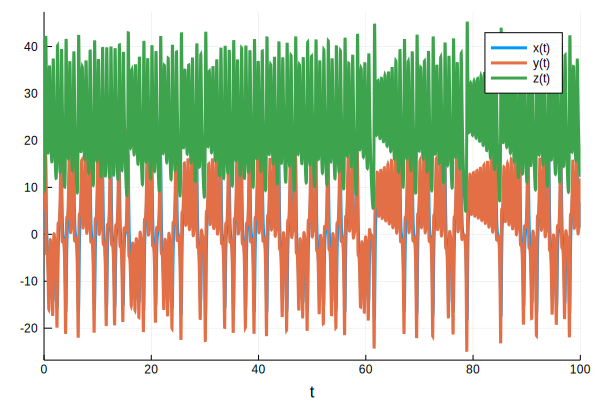

In [2]:
plot(sol)

Now let's change it to a phase plot. As discussed in the [plot functions page](http://docs.juliadiffeq.org/latest/basics/plot.html), we can use the `vars` command to choose the variables to plot. Let's plot variable `x` vs variable `y` vs variable `z`:

In [4]:
plot(sol,vars=(:x,:y,:z))

MethodError: MethodError: no method matching pointer(::Symbol)
Closest candidates are:
  pointer(!Matched::String) at strings/string.jl:81
  pointer(!Matched::String, !Matched::Integer) at strings/string.jl:82
  pointer(!Matched::SubString{String}) at strings/substring.jl:104
  ...

We can also choose to plot the timeseries for a single variable:

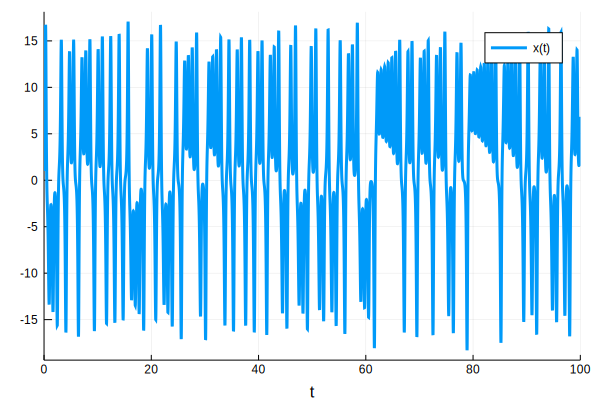

In [5]:
plot(sol,vars=[:x])

Notice that we were able to use the variable names because we had defined the problem with the macro. But in general, we can use the indices. The previous plots would be:

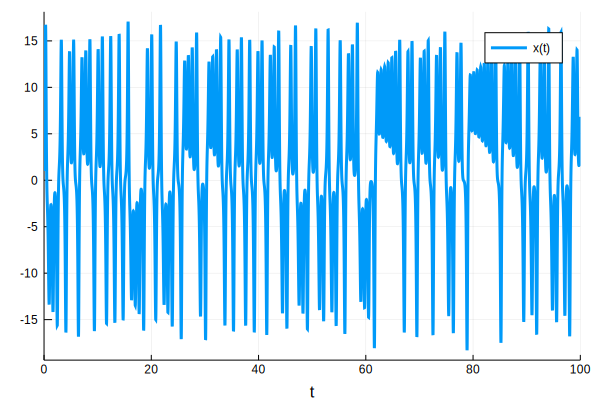

In [6]:
plot(sol,vars=(1,2,3))
plot(sol,vars=[1])

Common options are to add titles, axis, and labels. For example:

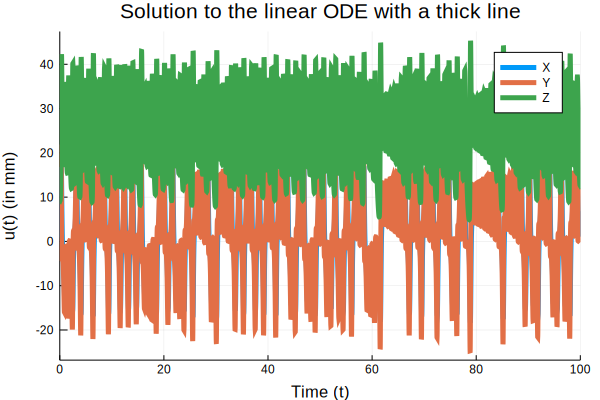

In [7]:
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
xaxis="Time (t)",yaxis="u(t) (in mm)",label=["X","Y","Z"])

Notice that series recipes apply to the solution type as well. For example, we can use a scatter plot on the timeseries:

In [8]:
scatter(sol,vars=[:x])

This shows that the recipe is using the interpolation to smooth the plot. It becomes abundantly clear when we turn it off using `denseplot=false`:

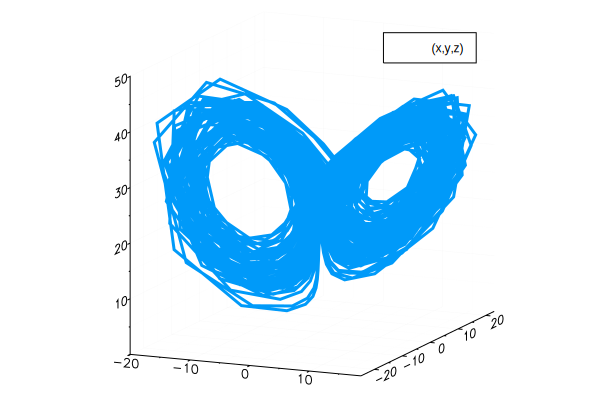

In [9]:
plot(sol,vars=(1,2,3),denseplot=false)

When this is done, only the values the timestep hits are plotted. Using the interpolation usually results in a much nicer looking plot so it's recommended, and since the interpolations have similar orders to the numerical methods, their results are trustworthy on the full interval. We can control the number of points used in the interpolation's plot using the `plotdensity` command:

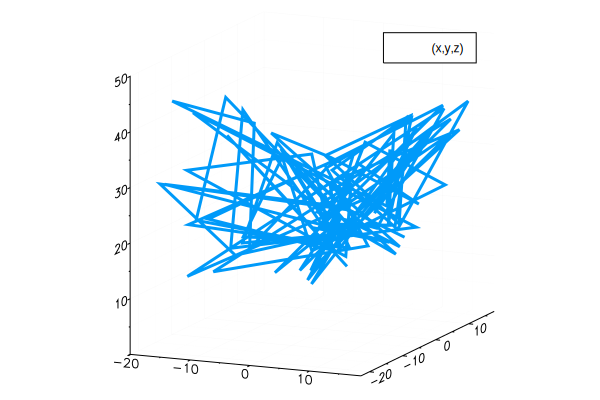

In [10]:
plot(sol,vars=(1,2,3),plotdensity=100)

That's plotting the entire solution using 100 points spaced evenly in time.

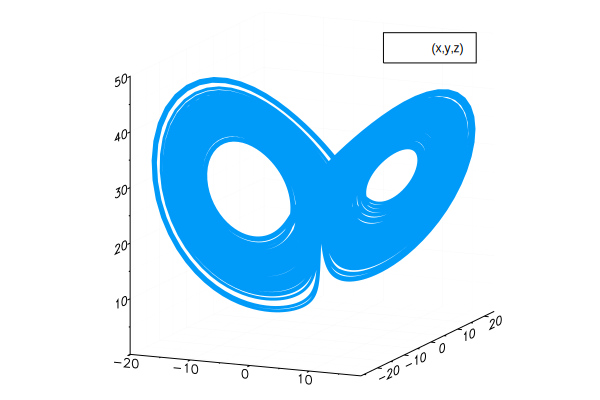

In [11]:
plot(sol,vars=(1,2,3),plotdensity=10000)

That's more like it! By default it uses `100*length(sol)`, where the length is the number of internal steps it had to take. This heuristic usually does well, but unusually difficult equations it can be relaxed (since it will take small steps), and for equations with events / discontinuities raising the plot density can help resolve the discontinuity.

Lastly notice that we can compose plots. Let's show where the 100 points are using a scatter plot:

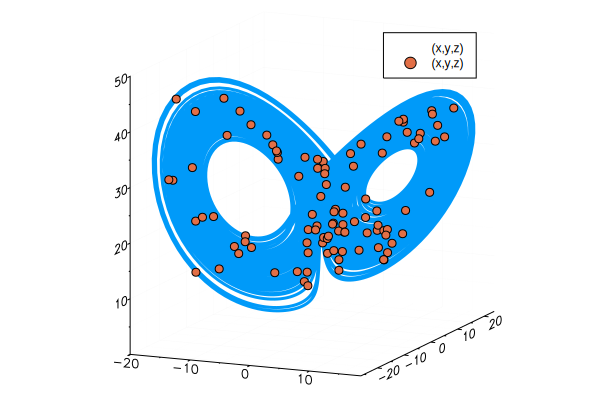

In [12]:
plot(sol,vars=(1,2,3))
scatter!(sol,vars=(1,2,3),plotdensity=100)

We can instead work with an explicit plot object. This form can be better for building a complex plot in a loop.

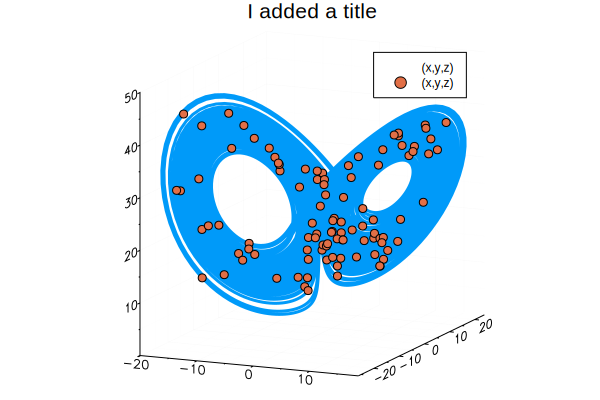

In [13]:
p = plot(sol,vars=(1,2,3))
scatter!(p,sol,vars=(1,2,3),plotdensity=100)
title!("I added a title")

You can do all sorts of things. Have fun!